In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code')
from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_1X, save_path
from tomo2mesh.projects.eaton.recon import recon_slice, recon_binned
from tomo2mesh.misc import viewer
from tomo2mesh.misc.voxel_processing import cylindrical_mask, modified_autocontrast
# from tomo2mesh.fbp.subset import recon_all
from tomo2mesh.misc import viewer
import pandas as pd

In [2]:
sample_num = 'TCRP3_injmold'
scan_tag = 140
projs, theta, center_guess, dark, flat = read_raw_data_1X(str(sample_num), str(scan_tag))

In [3]:
center_guess = 1172
search_width = 100 #200
search_res = 5
num = int(search_width/search_res + 1)

In [4]:
centers = np.linspace(-search_width//2+center_guess,search_width//2+center_guess,num, endpoint = True)

In [5]:
images = []
for ii, center in enumerate(centers):
    image = recon_slice(projs, theta, center, dark, flat, 0.5, 3.13)[np.newaxis,...]
    cylindrical_mask(image, 1.0, mask_val = image.min())
    image = image[0]
    images.append(image)
    print(r'%i of %i'%(ii, len(centers)), end = ";")

data shape: (ntheta, nz, n) (3000, 21, 2448)
0 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
1 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
2 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
3 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
4 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
5 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
6 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
7 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
8 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
9 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
10 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
11 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
12 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
13 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
14 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
15 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
16 of 21;data shape: (ntheta, nz, n) (3000, 21, 2448)
17 of 21;data shape: (ntheta, nz, n) (3000, 21,

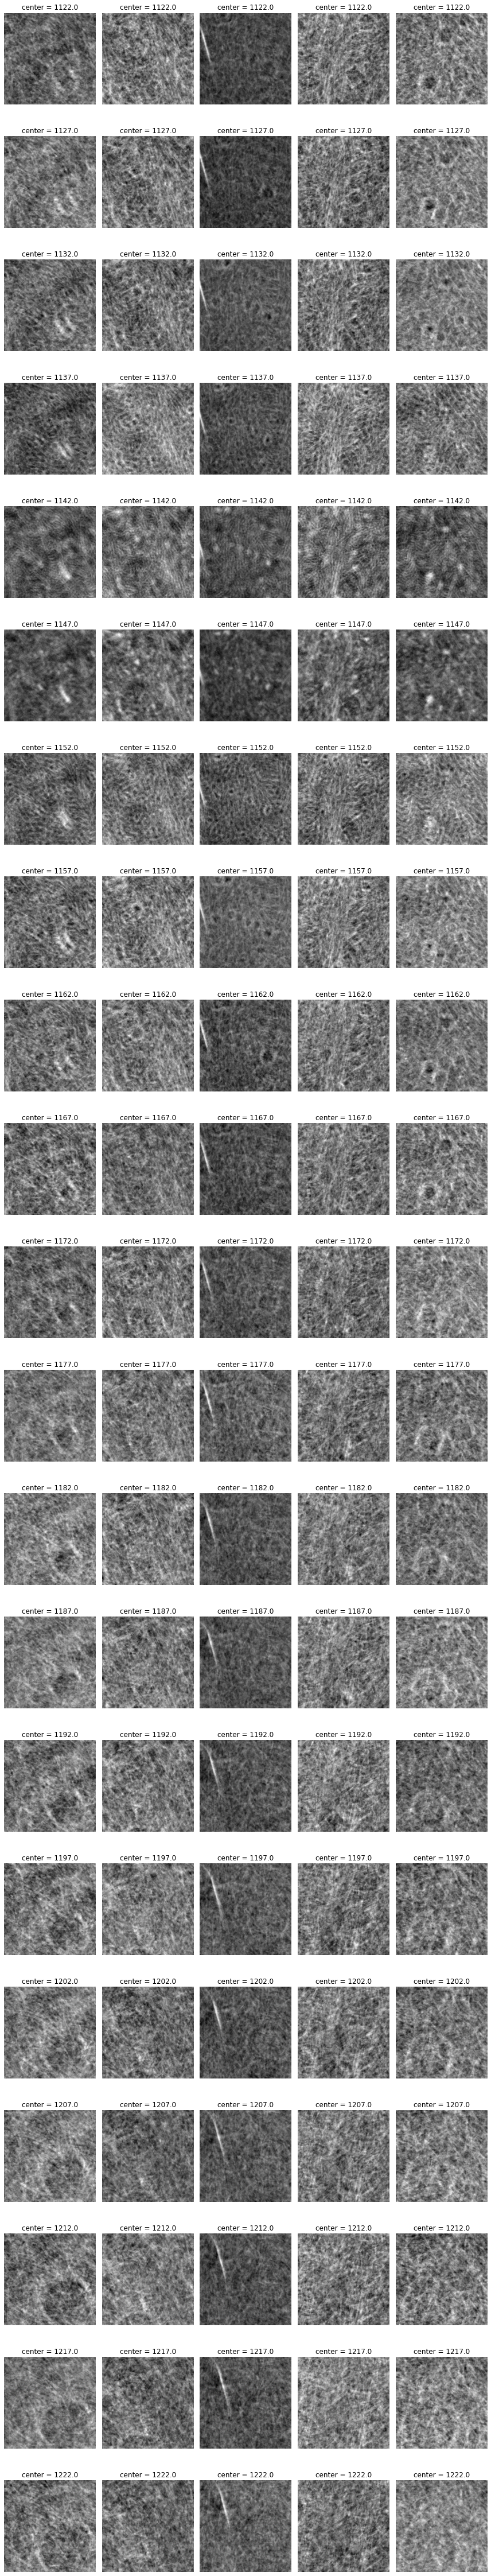

In [6]:
s = []
s.append((slice(500,750), slice(500,750)))
s.append((slice(500,750), slice(1750,2000)))      
s.append((slice(1500,1750), slice(500,750)))
s.append((slice(1500,1750), slice(1750,2000)))
s.append((slice(200,450), slice(1000,1250)))
fig, ax = plt.subplots(len(images),5, figsize = (12,len(images)/4.0*12))
for ii in range(len(images)):
    for i4 in range(5):
        ax[ii,i4].imshow(images[ii][s[i4]], cmap = 'gray')
        ax[ii,i4].set_title(f"center = {centers[ii]}")
        ax[ii,i4].axis('off')
fig.tight_layout()

## Write Center to CSV File

In [ ]:
correct_center = float(input("What's the correct center? "))

In [ ]:
image = images[np.argmin(np.abs(centers-correct_center))]

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(image, cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13, fontsize = 14, loc = 'center')
# ax.axis('off')

In [ ]:
df = pd.read_csv(save_path)
df.loc[(df["sample_num"] == sample_num) & (df["scan_num"] == scan_tag),"rot_cen"] = correct_center
df.to_csv(save_path,index = False)

## Vis full recon

In [ ]:
# sample_num = '2'
# scan_tag = 119
# projs, theta, center_guess, dark, flat = read_raw_data_1X(str(sample_num), str(scan_tag))

V = recon_binned(projs, theta, correct_center, dark, flat, 4, 3.13).get()
h = modified_autocontrast(V)
V = np.clip(V, *h)
cylindrical_mask(V, 1.0, mask_val = V.min())

In [ ]:
imgs = viewer.get_orthoplanes(vol = V)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[1], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
ax.axis('off')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[0], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
ax.axis('off')

In [ ]:
theta.shape